# Examples Notebook - SLU18 - Unsupervised Learning

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler

%matplotlib inline

## K-Means and normalization

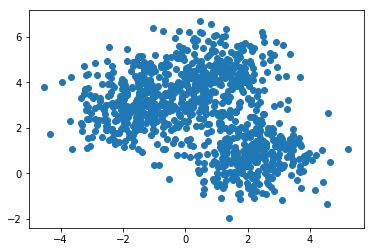

In [2]:
# Create a toy dataset, using scikit
X, _ = make_blobs(n_samples=1000, centers=3, n_features=2, random_state=0)

# Plot the dataset
plt.scatter(X[:,0], X[:,1])

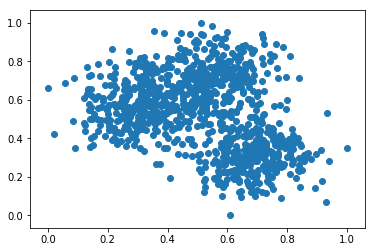

In [3]:
# Use MinMaxScaler to scale all the dimensions to values between 0 and 1
sclr = MinMaxScaler().fit(X)
normalized_X = sclr.transform(X)

# Plot the scaled data
plt.scatter(normalized_X[:,0], normalized_X[:,1])

In [4]:
# Use K-Means algorithm to cluster the data
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(normalized_X)
labels = kmeans.predict(normalized_X)

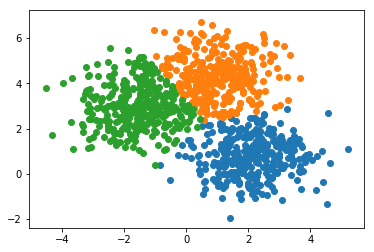

In [5]:
# Plot the results, where each color correpsonds to a different cluster
for i in range(3):
    data = X[labels==i]
    plt.scatter(data[:,0], data[:,1])

## PCA and standardization

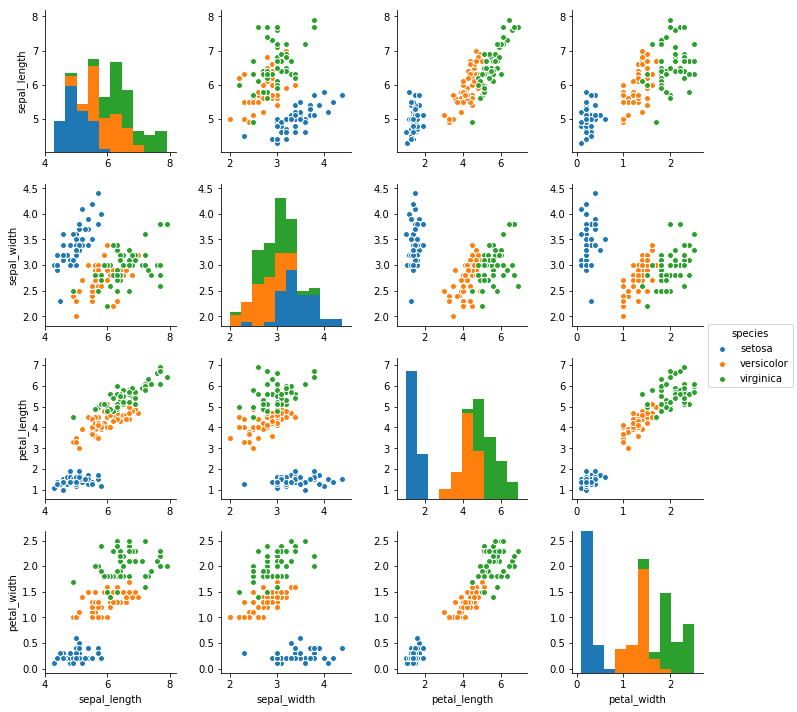

In [6]:
# Import the iris dataset from seaborn
iris = sns.load_dataset("iris")

# Plot the 4 features pairwise and check the different labels
sns.pairplot(iris, hue="species")

In [7]:
# Extract the features and labels from the dataset
features = iris.values[:, :-1].astype(float)
labels = iris.values[:, -1]

In [8]:
# Apply standardization to the features; this is a needed preprocessing before using PCA
sclr = StandardScaler().fit(features)
standardized_features = sclr.fit_transform(features)

In [9]:
# Use PCA to reduce our data from 4 features to only 2 features
pca = PCA(n_components=2).fit(standardized_features)
reduced_features = pca.transform(standardized_features)

Text(0,0.5,'second principal component')

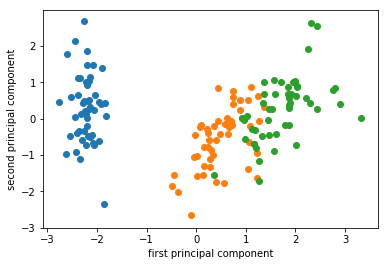

In [10]:
# Plot the data using just the 2 first principal components. We can see a good separation with only 2 features!
for i in ['setosa', 'versicolor', 'virginica']:
    # Select the data points that belong to each class
    data = reduced_features[labels == i]
    plt.scatter(data[:,0], data[:,1])
    
plt.xlabel('first principal component')
plt.ylabel('second principal component')